# Algebra Part 3.
## Atoms
Dada una estructura de datos, los atomos presentan **todas** sus componentes.

In [1]:
import sympy as sp
from sympy import I
from sympy.abc import x,y

(1 + x + 2*sp.sin(y + I*sp.pi)).atoms()

{1, 2, I, pi, x, y}

In [2]:
from sympy import Number, NumberSymbol, Symbol
(1 + x + 2*sp.sin(y + I*sp.pi)).atoms(Symbol)

{x, y}

In [3]:
(1 + x + 2*sp.sin(y + I*sp.pi)).atoms(Number, NumberSymbol)

{1, 2, pi}

In [4]:
(1 + x + 2*sp.sin(y + I*sp.pi)).atoms(Number, NumberSymbol,I)

{1, 2, I, pi}

In [5]:
# mas ejemplos
from sympy import Function, Mul
from sympy.core.function import AppliedUndef
f = Function('f')
(1 + f(x) + 2*sp.sin(y + I*sp.pi)).atoms(Function)

{f(x), sin(y + I*pi)}

In [7]:
(1 + f(x) + 2*sp.sin(y + I*sp.pi)).atoms(AppliedUndef)

{f(x)}

In [8]:
# extraer multiplicaciones
(1 + f(x) + 2*sp.sin(y + I*sp.pi)).atoms(Mul)

{2*sin(y + I*pi), I*pi}

## Suposiciones acerca de los simbolos (assumptions)


In [10]:
from sympy import symbols
n = symbols('n', positive=True, integer=True)
n.is_positive

True

In [11]:
n.is_integer

True

In [13]:
# ver todas las suposiciones sobre el simbolo n
n.assumptions0

{'positive': True,
 'commutative': True,
 'extended_real': True,
 'real': True,
 'imaginary': False,
 'extended_nonzero': True,
 'extended_nonnegative': True,
 'complex': True,
 'extended_negative': False,
 'finite': True,
 'negative': False,
 'infinite': False,
 'nonpositive': False,
 'extended_positive': True,
 'hermitian': True,
 'nonnegative': True,
 'zero': False,
 'nonzero': True,
 'extended_nonpositive': False,
 'integer': True,
 'irrational': False,
 'algebraic': True,
 'rational': True,
 'transcendental': False,
 'noninteger': False}

In [14]:
# como n es entero
(-1)**(2*n)

1

In [15]:
(-1)**(2*n + 1)

-1

In [16]:
x=symbols('x', real=True)
(-1)**(2*x)

(-1)**(2*x)

## Sumatorias y productorias

Observemos las dos siguientes expresiones


$$\sum_{i=1}^5 (x + i y) = (x+y) + (x + 2y) + (x + 3y) + (x+4y) + (x + 5 y) =5x + 15 y.$$

$$\prod_{i=1}^5 (x + i y) = (x+y)(x + 2y)(x + 3y)(x+4y) (x + 5 y) .$$


In [17]:
from sympy import symbols, summation, product
x,y,i = symbols('x y i')

s = summation( x+ i*y , (i, 1,5))
s

5*x + 15*y

In [19]:
p = product( x + i*y, (i, 1, 5))
p

(x + y)*(x + 2*y)*(x + 3*y)*(x + 4*y)*(x + 5*y)

In [22]:
from sympy import expand, factor
fp = expand(p)
fp


x**5 + 15*x**4*y + 85*x**3*y**2 + 225*x**2*y**3 + 274*x*y**4 + 120*y**5

In [24]:
p.expand()  # mas directamente

x**5 + 15*x**4*y + 85*x**3*y**2 + 225*x**2*y**3 + 274*x*y**4 + 120*y**5

In [25]:
factor(fp)

(x + y)*(x + 2*y)*(x + 3*y)*(x + 4*y)*(x + 5*y)

### Actividad 1.
Escriba una **funcion** que calcule

$$\prod_{i=1}^5 \sum_{j=1}^5 (i x + jy).$$
$$\sum_{i=1}^5 \prod_{j=1}^5 (i x + jy).$$

Cuando lo vayan a hacer hacerlo con $i=1,2$, $j=1,2$ A mano y programarlo.



### Evaluar expresiones

In [27]:
expr = expand((x+y)**3)
expr

x**3 + 3*x**2*y + 3*x*y**2 + y**3

In [28]:
expr.subs(y, 2*x) # sustitucion algebraica

27*x**3

In [29]:
expr2 = expr.subs(y, 5) # sustitucion numerica
expr2

x**3 + 15*x**2 + 75*x + 125

In [33]:
# dos formas con sub y con replace
import sympy as sp
exprPi =expr2.subs(x, sp.pi) # sustitucion simbolida
exprPi

pi**3 + 125 + 15*pi**2 + 75*pi

In [31]:
exprPi.evalf()

539.669791715875

In [32]:
# otra forma de evaluar
expr2.replace(x, sp.pi)

pi**3 + 125 + 15*pi**2 + 75*pi

Seria interesante poder reemplazar todo un arreglo en estas expresiones. Tratemos


In [34]:
import numpy as np
myArray = np.array([1,2,3])
exprList = expr2.subs(x, myArray)

SympifyError: SympifyError: array([1, 2, 3])

### Actividad 2.
Pasar un arreglo como un diccionario a la expresion `expr2` con el fin de corregir el error anterior.

Otra forma es usando `lambdify`

In [36]:
from sympy import lambdify

f = lambdify(x, expr2, "numpy")
exprList = f(myArray)
exprList

array([216, 343, 512])

In [37]:
f(1)

216

## Actividad 3

Sabemos que

$$ \mathrm{e}^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} .$$

Truncaremos esta expresion hasta un numero entero positivo $N$

$$ \mathrm{e}^x \approx \sum_{n=0}^{N} \frac{x^n}{n!} .$$


1. Defina una funcion de $N$ que encuentra la aproximacion (de la exponencial) de forma simbolica.
2. Sustituya $x$ por $-y^2$ para evaluar $\mathrm{e}^{-y^2}$ (tipo Gaussiano)
3. Lambdify esta funcion usando `NumPy` y `matplotlib` para graficar la funcion aproximada contra la exacta en el intervalo $[-2,2]$.

4. Grafique las dos funciones y el error (la diferencia) para varios valores de $N$, $N=10,20,30$.

5. Imprima el maximo error para $N=30$. Debe ser cerca
$$1.519617764955683e-15 .$$




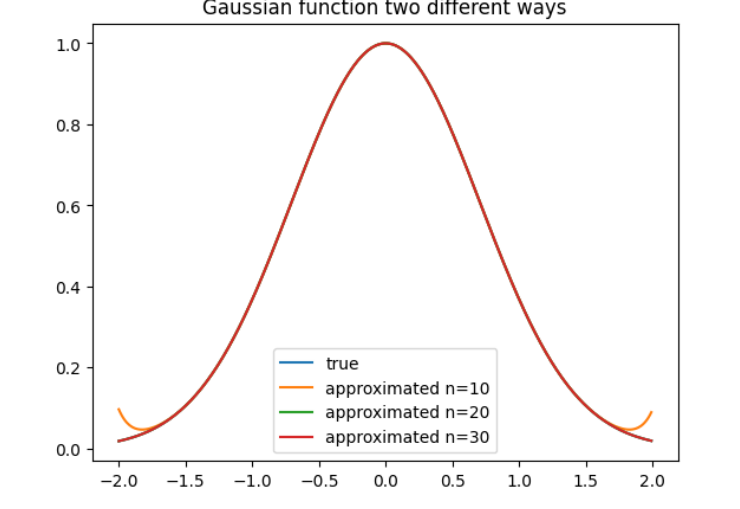

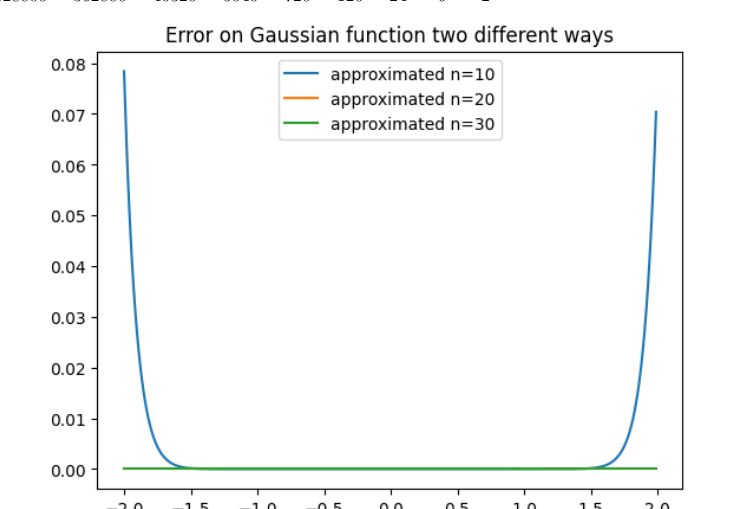

### Algebra lineal
#### Matrices
Mostramos como resolver el problema $Ax = b$ usando `SymPy`.
La idea es **extender** la matriz $A$ de forma $M =[A | b]$

Ejemplo.  Resuelva el siguiente sistema


\begin{eqnarray}
x + y + z &=& 5 \\
2 x + 4 y + 3 z &=& 2  \\
x - 4y + z &=& -1
\end{eqnarray}

In [38]:
from sympy import Matrix, solve_linear_system
x,y,z = symbols('x y z')

# note que la sintaxis es la de numpy
M = Matrix( [ [1,1,1,5 ], [2,4,3,2], [1,-4,1,-1]])
M # QC

Matrix([
[1,  1, 1,  5],
[2,  4, 3,  2],
[1, -4, 1, -1]])

In [40]:
# hay otra forma de hacer esto
A = Matrix ( [ [1,1,1], [2,4,3],[1,-4,1]])
display(A)
b = Matrix( [ [5], [2], [-1]])
display(b)


Matrix([
[1,  1, 1],
[2,  4, 3],
[1, -4, 1]])

Matrix([
[ 5],
[ 2],
[-1]])

In [41]:
# pegamos el vector a la matriz
M =A.col_insert(3,b)
M

Matrix([
[1,  1, 1,  5],
[2,  4, 3,  2],
[1, -4, 1, -1]])

In [42]:
# resolvemos el sistema
slns = solve_linear_system(M, x, y, z)
slns

{x: 71/5, y: 6/5, z: -52/5}

## Mas funciones importantes del algebra lineal
| Method | Returns
| :---: | ---- |
`det()` |  determinante de una matriz |
`eigenvals()` |  autovalores de la matriz |
`eigenvecs()` |  autovectores de la matriz |
`is_nilpotent()` | la matriz es nilpotente |
`norm()` | norma de una matriz |
`nullspace()` | espacio nulo de una matriz |
`rref()` | row-reduced echelon form (Gaussian elimination |
`singular_values()` | valores singulares |

Veamos solo el `rref()`.

In [43]:
M.rref()

(Matrix([
 [1, 0, 0,  71/5],
 [0, 1, 0,   6/5],
 [0, 0, 1, -52/5]]),
 (0, 1, 2))

### Actividad 4.
Vemos la matriz identidad, la solucion de $Ax=b$ y un vector $(0,1,2)$. Que es este vector?

In [44]:
A = Matrix( [[2,1,-2], [1,0,0], [0,1,0]])
A

Matrix([
[2, 1, -2],
[1, 0,  0],
[0, 1,  0]])

In [45]:
A.eigenvals()

{2: 1, 1: 1, -1: 1}

### Actividad 5

Obtenga los autovalores de la matriz $A$ como la solucion del polinomio caracteristico $p(\lambda)= \det(A - \lambda I)$

* Busquen la forma de usar $I$ lo mas simple en `Python`
* Usen $\lambda_1$ en vez de $\lambda$ (`lambda` es reservada para `Python`.
* Usen `roots()` en vez de `solve()` para que sea mas consistente con lo que mostramos arriba.

Ejemplo de cinematica tomado de
[Mr P. Solver](https://www.youtube.com/watch?v=1yBPEPhq54M).


Considere un objeto que cae (caida libre) y una plataforma que sube con una aceleracion $q$ y velocidad inicial $v_p$ altura inicial 0. La altura inicial del objeto es $h_0$.
La pregunta es encuentre la velocidad cuando los cuerpos se encuentran (se asume que el objeto esta por encima de la plataforma)


Tenemos

1. Objeto
$$ h_o(t) =  h_0 - v_0 t - \frac12 g t^2 .$$
2. Plataforma
$$ h_p(t) =  v_p t + \frac12 q t^2 .$$

Definimoas bien las variables


| variable | meaning |
| -------- | ------- |
| t | time |
| h_0 | altura inicial de el objeto |
| v_0 | velocidad inicial de el objeto |
| g | constante de la gravedad |
| q | aceleracion del objeto |
| v_p | velocidad de la plataforma |

Neceitamos hallar la altura y velocidad donde se encuentran el objeto y la plataforma


\begin{eqnarray}
h_0(t ) &=& h_p(t) \\
\frac{d h_0}{dt}(t) &=& - \frac{dh_p}{dt}
\end{eqnarray}

In [48]:
from sympy import Rational
t, h_0, v_0, g, v_p, q = symbols('t, h_0, v_0, g, v_p, q', real=True, positive=True)
h0t = h_0 - v_0*t - Rational(1,2)*g*t**2
dh0dt = -g*t - v_0
hpt = v_p*t + Rational(1,2)*q*t**2
dhpdt = v_p + q*t

In [49]:
display(h0t)
display(dh0dt)
display(hpt)
display(dhpdt)

-g*t**2/2 + h_0 - t*v_0

-g*t - v_0

q*t**2/2 + t*v_p

q*t + v_p

In [51]:
# las ecuaciones son del format eq=0
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt

In [52]:
display(eq1)
display(eq2)

-g*t**2/2 + h_0 - q*t**2/2 - t*v_0 - t*v_p

-g*t + q*t - v_0 + v_p

In [56]:
# resolvemos las ecuaciones
from sympy import solve
t_collide, v_initfall = solve( [eq1, eq2], [t, v_0])[0]
display(t_collide)
display(v_initfall)

(-v_p + v_p*(g + q)/(-g + 3*q) - sqrt(2)*(-g + q)*sqrt(-g*h_0 + 3*h_0*q + 2*v_p**2)/(-g + 3*q))/(-g + q)

v_p*(g + q)/(-g + 3*q) - sqrt(2)*(-g + q)*sqrt(-g*h_0 + 3*h_0*q + 2*v_p**2)/(-g + 3*q)

In [58]:
# sustituimos las soluciones
vh = dh0dt.subs( [ (t, t_collide), (v_0, v_initfall)])
vh

-g*(-v_p + v_p*(g + q)/(-g + 3*q) - sqrt(2)*(-g + q)*sqrt(-g*h_0 + 3*h_0*q + 2*v_p**2)/(-g + 3*q))/(-g + q) - v_p*(g + q)/(-g + 3*q) + sqrt(2)*(-g + q)*sqrt(-g*h_0 + 3*h_0*q + 2*v_p**2)/(-g + 3*q)

In [60]:
from sympy import simplify
simplify(vh)

(g*v_p - q*v_p + q*sqrt(-2*g*h_0 + 6*h_0*q + 4*v_p**2))/(-g + 3*q)

In [61]:
# all in one
vh =  dh0dt.subs( [ (t, t_collide), (v_0, v_initfall)]).simplify()
vh


(g*v_p - q*v_p + q*sqrt(-2*g*h_0 + 6*h_0*q + 4*v_p**2))/(-g + 3*q)

In [62]:
vp =  dhpdt.subs( [ (t, t_collide), (v_0, v_initfall)]).simplify()
vp

(-g*v_p + q*v_p - q*sqrt(-2*g*h_0 + 6*h_0*q + 4*v_p**2))/(-g + 3*q)